<a href="https://colab.research.google.com/github/kursatdinc/deeplearning-ann-mnist/blob/main/ANN_Uygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yapay Sinir Ağları (ANN) ile Rakam Tanıma


1.   İş Problemi (Business Problem)
2.   Veriyi Anlamak (Data Understanding)
3.   Veriyi Hazırlamak (Data Preparation)
4.   Modelleme (Modeling)
5.   Değerlendirme (Evaluation)


### 1) İş Problemi (Business Problem)

Problem : İnsan gücü kaynağını daha verimli kullanabilir miyiz ?

MNIST ("Modified National Institute of Standards and Technology")

Veri seti hakkında daha fazla bilgi için: http://yann.lecun.com/exdb/minsy/index.html ziyaret edebilirsiniz.

<img src="https://storage.googleapis.com/khanhlvg-public.appspot.com/digit-classifier/mnist.png" />

### 2) Veriyi Anlamak (Data Understanding)

In [ ]:
# pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [ ]:
# Mnist veri setinin yüklenmesi

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print("Eğitim Seti Boyutu", x_train.shape, y_train.shape)

Eğitim Seti Boyutu (60000, 28, 28) (60000,)


In [ ]:
print("Test Seti Boyutu", x_test.shape, y_test.shape)

Test Seti Boyutu (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train)) #10

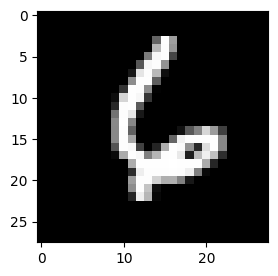

In [ ]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize=(3,3))
plt.imshow(x_train[59000], cmap="gray") #59000. veri görseli

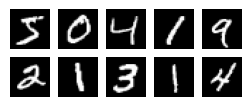

In [ ]:
plt.figure(figsize=(3,3))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap="gray")
  plt.axis("off")

In [ ]:
def visualize_img(data, img_num):
  plt.figure(figsize=(3,3))
  for n in range(img_num):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap="gray")
    plt.axis("off")

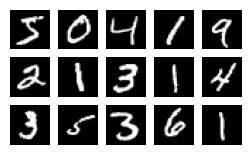

In [ ]:
visualize_img(x_train, 15)

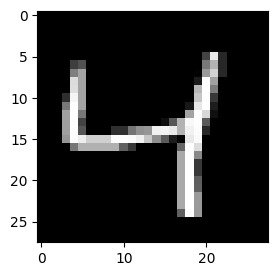

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[2], cmap="gray")

In [ ]:
# RGB (0 - 255)
# r:250 g:10 b:240 mor
# r:250 g:0 b:250 daha koyu mor

In [ ]:
x_train[2] # Resimin sayısal matris karşılığı

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[2][10,10] # Pixel kordinat rgb ortalaması

0

In [ ]:
x_train[2][14,10]

49

In [ ]:
x_train[2].mean() # Görselin matrisi numpy arrayi olduğu için matematiksel işlemler yapılabilir.

24.799744897959183

In [ ]:
x_train[2].sum()

19443

In [ ]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color="white" if img[x][y]<threshold else "black")

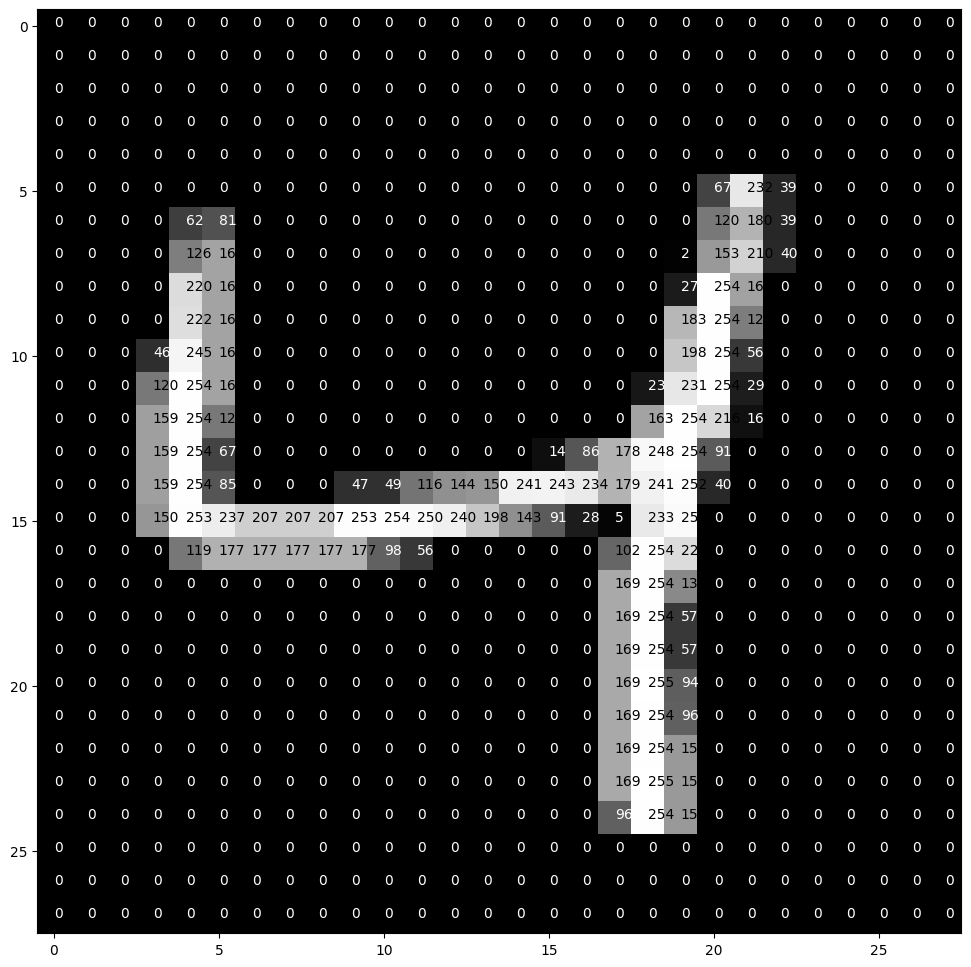

In [ ]:
pixel_visualize(x_train[2])

### 3) Veriyi Hazırlamak (Data Preparation)

#### Encoding

- Önce: [0 1 2 3 4 5 6 7 8 9]
- Sonra: [0 0 1 0 0 0 0 0 0]

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### Reshaping

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


#### Standardization

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### 4) Modelleme (Modeling)

#### Sinir Ağı Mimarisini Tanımlamak

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation="relu", name="layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer")])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0620 - precision: 0.9852 - recall: 0.9791 - accuracy: 0.9820 - val_loss: 0.0805 - val_precision: 0.9778 - val_recall: 0.9713 - val_accuracy: 0.9742
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0528 - precision: 0.9873 - recall: 0.9821 - accuracy: 0.9847 - val_loss: 0.0771 - val_precision: 0.9786 - val_recall: 0.9730 - val_accuracy: 0.9754
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0443 - precision: 0.9891 - recall: 0.9849 - accuracy: 0.9870 - val_loss: 0.0823 - val_precision: 0.9791 - val_recall: 0.9747 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0366 - precision: 0.9912 - recall: 0.9879 - accuracy: 0.9896 - val_loss: 0.0741 - val_precision: 0.9793 - val_recall: 0.9757 - val_accuracy: 0.9768
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0310 - precision: 0.9930 - r

### 5) Model Başarısını Değerlendirme (Evaluation)



In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0120 - precision: 0.9977 - recall: 0.9969 - accuracy: 0.9973 - val_loss: 0.0758 - val_precision: 0.9798 - val_recall: 0.9776 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0100 - precision: 0.9983 - recall: 0.9977 - accuracy: 0.9980 - val_loss: 0.0811 - val_precision: 0.9797 - val_recall: 0.9768 - val_accuracy: 0.9778
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0088 - precision: 0.9985 - recall: 0.9980 - accuracy: 0.9983 - val_loss: 0.0798 - val_precision: 0.9791 - val_recall: 0.9770 - val_accuracy: 0.9776
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0077 - precision: 0.9987 - recall: 0.9984 - accuracy: 0.9986 - val_loss: 0.0837 - val_precision: 0.9797 - val_recall: 0.9777 - val_accuracy: 0.9783
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0063 - precision: 0.9992 - 

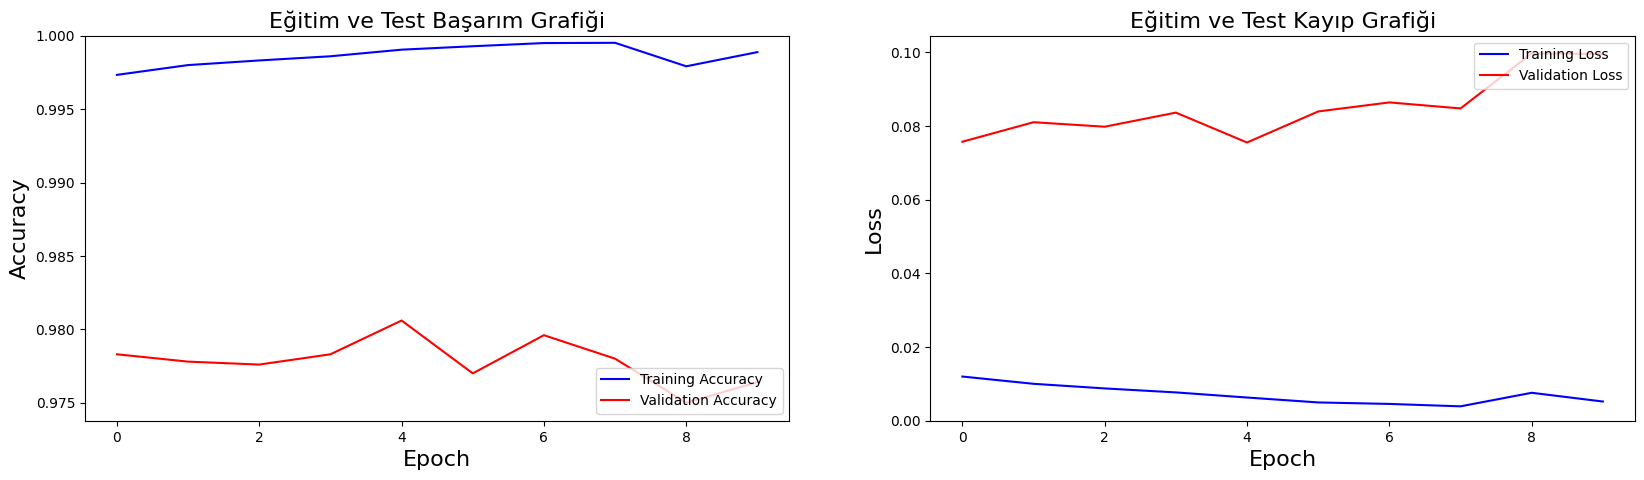

In [ ]:
###############################
# Accuracy ve Loss Grafikleri #
###############################

#-------------------- Grafik 1 Accuracy --------------------#

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize=16)

#---------------------- Grafik 2 Loss ----------------------#

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize=16)
plt.show()

In [ ]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.6%

Test Loss: 10.0%

Test Precision: 97.8%

Test Recall: 97.6%


### Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [ ]:
model.save("mnist_model.h5")

In [ ]:
import random

random = random.randint(0, x_test.shape[0])

In [ ]:
random

3861

In [ ]:
test_image = x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

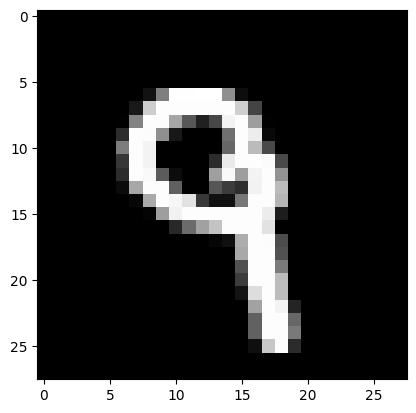

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap="gray")

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 156ms/step


In [ ]:
probability

array([[1.4285024e-14, 2.2899326e-13, 4.4248025e-12, 1.1376494e-09,
        1.7179429e-08, 6.0481470e-13, 3.4393152e-20, 3.6083125e-07,
        3.2504403e-08, 9.9999964e-01]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)

In [ ]:
predicted_classes

9

In [ ]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

Tahmin Edilen Sınıf: 9 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999996423721313 

Diğer Sınıfların Olasılık Değerleri: 
[[1.4285024e-14 2.2899326e-13 4.4248025e-12 1.1376494e-09 1.7179429e-08
  6.0481470e-13 3.4393152e-20 3.6083125e-07 3.2504403e-08 9.9999964e-01]]
